In [1]:
import pandas as pd
import numpy as np
# Set the maximum number of rows to display
pd.set_option('display.max_rows', 100)

# Set the maximum number of columns to display
pd.set_option('display.max_columns', 50)
# Set the width of the display in characters
pd.set_option('display.width', 1000)

In [2]:
data=pd.read_csv('train.csv')

In [3]:
# Display the first few rows of the dataset
print("First few rows of the dataset:\n", data.head(5))

# Display the shape and data types of the dataset
print("\nShape of the dataset:", data.shape)
print("\nData types of the columns:\n", data.dtypes)

First few rows of the dataset:
    id keyword location                                               text  target
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...       1
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada       1
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...       1
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...       1
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...       1

Shape of the dataset: (7613, 5)

Data types of the columns:
 id           int64
keyword     object
location    object
text        object
target       int64
dtype: object


In [4]:
# Calculate the percentage of missing values for each column
missing_percentages = (data.isnull().sum() / len(data)) * 100

# Filter out columns that have zero missing values to clean up the table
missing_percentages = missing_percentages[missing_percentages > 0]

# Convert to DataFrame for better formatting
missing_data = pd.DataFrame(missing_percentages, columns=['% of Missing Values'])

# Sort the DataFrame by percentage of missing descending
missing_data.sort_values(by='% of Missing Values', ascending=False, inplace=True)

# Display the DataFrame
print(missing_data)

          % of Missing Values
location            33.272035
keyword              0.801261


In [5]:
# Display random sample tweets
print("\nSample tweets:\n", data['text'].sample(5))

# Explore the length of the tweets
data['text_length'] = data['text'].apply(len)
print("\nStatistics of text lengths:\n", data['text_length'].describe())

# Explore the word count of the tweets
data['word_count'] = data['text'].apply(lambda x: len(x.split()))
print("\nStatistics of word counts:\n", data['word_count'].describe())



Sample tweets:
 1565    2Leezy its like you're about to fall down a cl...
4006    PAGASA 7:12am: YELLOW warning - Panay Island G...
1751    Baltimore City : I-95 NORTH AT MP 54.8 (FORT M...
4383    @JagexHelpDibi update JAG enabled but a hijack...
1949    WHEN U BOMBED AND U TRY 2 GET HOME FOR CURFEW ...
Name: text, dtype: object

Statistics of text lengths:
 count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: text_length, dtype: float64

Statistics of word counts:
 count    7613.000000
mean       14.903586
std         5.732604
min         1.000000
25%        11.000000
50%        15.000000
75%        19.000000
max        31.000000
Name: word_count, dtype: float64


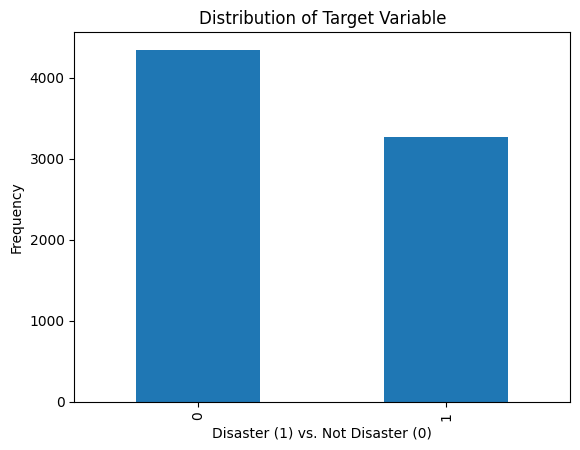

In [6]:
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
data['target'].value_counts().plot(kind='bar')
plt.title('Distribution of Target Variable')
plt.xlabel('Disaster (1) vs. Not Disaster (0)')
plt.ylabel('Frequency')
plt.show()

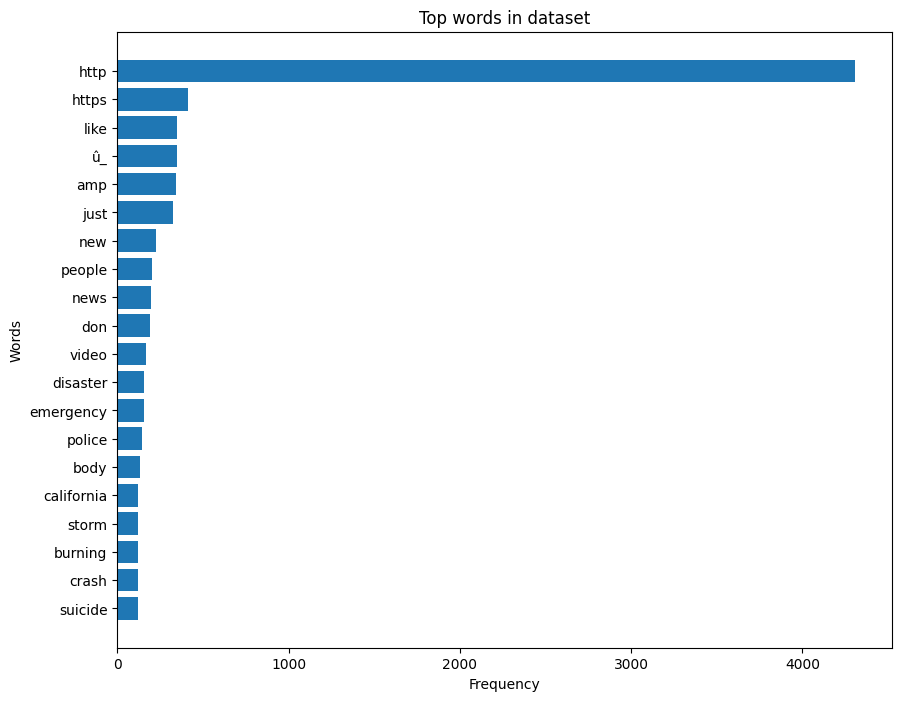

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to plot top N most common words
def plot_top_words(text, n=20):
    vec = CountVectorizer(stop_words='english').fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    words, counts = zip(*words_freq[:n])
    
   # Plotting the words on the y-axis and frequencies on the x-axis
    plt.figure(figsize=(10, 8))  # Adjusted for better display of horizontal bars
    plt.barh(words, counts)  # Using barh for horizontal bars
    plt.title('Top words in dataset')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.gca().invert_yaxis()  # Invert y-axis to display the highest values at the top
    plt.show()


# Plot top words
plot_top_words(data['text'])

In [8]:
# Calculate the length of each text entry and store it in a new column 'length'
data['length'] = data['text'].apply(len)

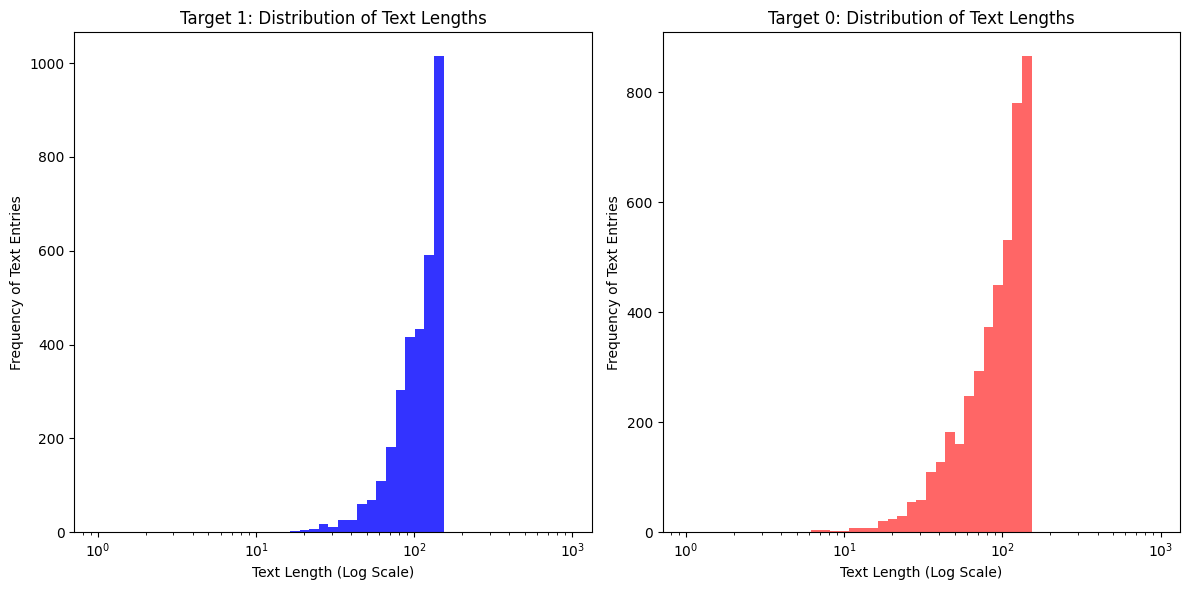

In [22]:
import matplotlib.pyplot as plt
import numpy as np  # Make sure numpy is included for arithmetic operations

# Set up the bins for the logarithmic scale
bins = 1.15 ** (np.arange(0, 50))

# Create a figure with two subplots, side by side
plt.figure(figsize=(12, 6))  # Adjust the figure size as necessary

# Histogram for 'target' == 1
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist(data[data['target'] == 1]['length'], bins=bins, alpha=0.8, color='blue')
plt.xscale('log')
plt.xlabel('Text Length (Log Scale)')
plt.ylabel('Frequency of Text Entries')
plt.title('Target 1: Distribution of Text Lengths')

# Histogram for 'target' == 0
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist(data[data['target'] == 0]['length'], bins=bins, alpha=0.6, color='red')
plt.xscale('log')
plt.xlabel('Text Length (Log Scale)')
plt.ylabel('Frequency of Text Entries')
plt.title('Target 0: Distribution of Text Lengths')

# Ensure layout is neat and no elements are overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [12]:
import string
# Define a function to count punctuation
def count_punctuation(text):
    return sum(1 for char in text if char in string.punctuation)

# Calculate the number of punctuation marks for each text entry and store it in a new column 'punct'
data['punct'] = data['text'].apply(count_punctuation)

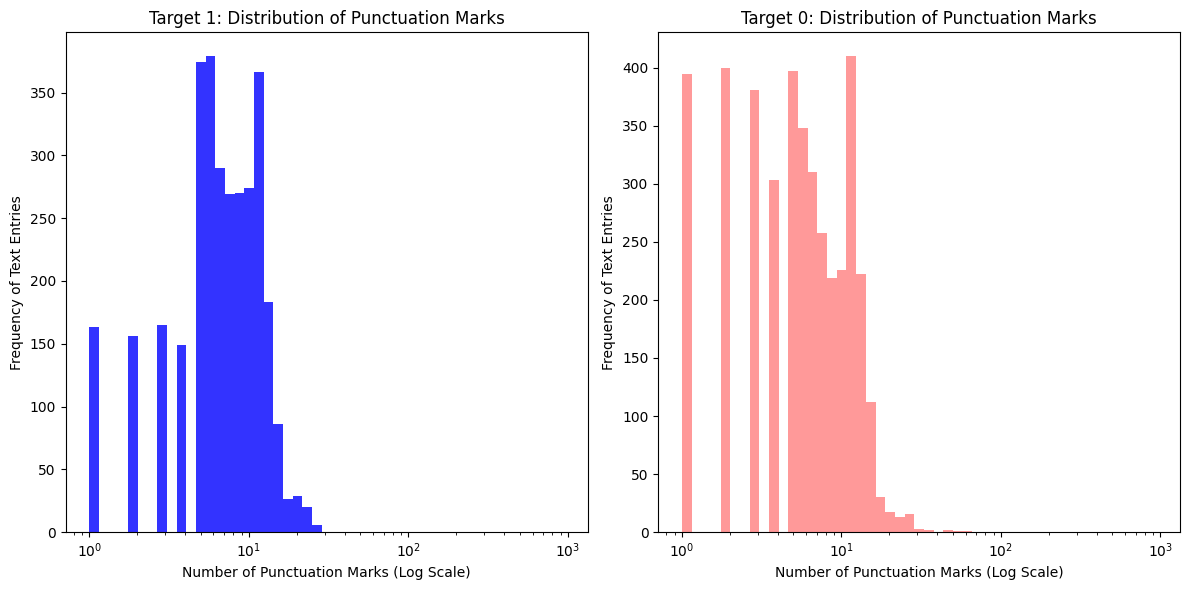

In [21]:
import matplotlib.pyplot as plt
import numpy as np  # Make sure to import numpy if not already done

# Set the x-axis to logarithmic scale and define bins
bins = 1.15 ** (np.arange(0, 50))

# Initialize a figure with subplots
plt.figure(figsize=(12, 6))  # Wider figure to accommodate two subplots side by side

# Histogram for 'target' == 1
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist(data[data['target'] == 1]['punct'], bins=bins, alpha=0.8, color='blue')
plt.xscale('log')
plt.xlabel('Number of Punctuation Marks (Log Scale)')
plt.ylabel('Frequency of Text Entries')
plt.title('Target 1: Distribution of Punctuation Marks')

# Histogram for 'target' == 0
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist(data[data['target'] == 0]['punct'], bins=bins, alpha=0.4, color='red')
plt.xscale('log')
plt.xlabel('Number of Punctuation Marks (Log Scale)')
plt.ylabel('Frequency of Text Entries')
plt.title('Target 0: Distribution of Punctuation Marks')

# Display the plot
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()
